## 기상과 지하철 혼잡도 Pearson 상관분석 (연도별)

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:

FILE_NAME_21 = 'dataset_csv_file/train_subway21.csv'
FILE_NAME_22 = 'dataset_csv_file/train_subway22.csv'
FILE_NAME_23 = 'dataset_csv_file/train_subway23.csv'

train_subway21_df = pd.read_csv(FILE_NAME_21)
train_subway22_df = pd.read_csv(FILE_NAME_22)
train_subway23_df = pd.read_csv(FILE_NAME_23)


In [29]:
print(train_subway21_df.columns)
print(train_subway22_df.columns)
print(train_subway23_df.columns)

Index(['train_subway21.tm', 'train_subway21.line',
       'train_subway21.station_number', 'train_subway21.station_name',
       'train_subway21.direction', 'train_subway21.stn', 'train_subway21.ta',
       'train_subway21.wd', 'train_subway21.ws', 'train_subway21.rn_day',
       'train_subway21.rn_hr1', 'train_subway21.hm', 'train_subway21.si',
       'train_subway21.ta_chi', 'train_subway21.congestion'],
      dtype='object')
Index(['train_subway22.tm', 'train_subway22.line',
       'train_subway22.station_number', 'train_subway22.station_name',
       'train_subway22.direction', 'train_subway22.stn', 'train_subway22.ta',
       'train_subway22.wd', 'train_subway22.ws', 'train_subway22.rn_day',
       'train_subway22.rn_hr1', 'train_subway22.hm', 'train_subway22.si',
       'train_subway22.ta_chi', 'train_subway22.congestion'],
      dtype='object')
Index(['train_subway23.tm', 'train_subway23.line',
       'train_subway23.station_number', 'train_subway23.station_name',
       'train_

In [3]:
train_subway21_df.columns = ['TM','Line', 'station_number','station_name','Direction','STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','Congestion']
train_subway22_df.columns = ['TM','Line', 'station_number','station_name','Direction','STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','Congestion']
train_subway23_df.columns = ['TM','Line', 'station_number','station_name','Direction','STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi','Congestion']

In [4]:
# 추가 결측치 반영 
# 풍향 변수 -9.9 -> 결측치

none_index_21 = train_subway21_df[train_subway21_df['WD']==-9.9].index
train_subway21_df.loc[none_index_21, 'WD'] = -99.0

none_index_22 = train_subway22_df[train_subway22_df['WD']==-9.9].index
train_subway22_df.loc[none_index_22, 'WD'] = -99.0

none_index_23 = train_subway23_df[train_subway23_df['WD']==-9.9].index
train_subway23_df.loc[none_index_23, 'WD'] = -99.0

In [5]:
train_subway21_df[train_subway21_df['WD']==-9.9]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion


In [6]:
train_subway22_df[train_subway22_df['WD']==-9.9]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion


In [7]:
train_subway23_df[train_subway23_df['WD']==-9.9]

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion


### 결측치 처리

In [8]:
train_subway21_df.isna().sum()

TM                0
Line              0
station_number    0
station_name      0
Direction         0
STN               0
TA                0
WD                0
WS                0
RN_DAY            0
RN_HR1            0
HM                0
SI                0
ta_chi            0
Congestion        0
dtype: int64

In [9]:
train_subway22_df.isna().sum()

TM                0
Line              0
station_number    0
station_name      0
Direction         0
STN               0
TA                0
WD                0
WS                0
RN_DAY            0
RN_HR1            0
HM                0
SI                0
ta_chi            0
Congestion        0
dtype: int64

In [10]:
train_subway23_df.isna().sum()

TM                0
Line              0
station_number    0
station_name      0
Direction         0
STN               0
TA                0
WD                0
WS                0
RN_DAY            0
RN_HR1            0
HM                0
SI                0
ta_chi            0
Congestion        0
dtype: int64

In [11]:
for column in train_subway21_df.columns:

    none_index = train_subway21_df[train_subway21_df[column]==-99.0].index
    train_subway21_df.loc[none_index, column] =  None

In [12]:
for column in train_subway22_df.columns:

    none_index = train_subway22_df[train_subway22_df[column]==-99.0].index
    train_subway22_df.loc[none_index, column] =  None

In [13]:
for column in train_subway23_df.columns:

    none_index = train_subway23_df[train_subway23_df[column]==-99.0].index
    train_subway23_df.loc[none_index, column] =  None

In [14]:
train_subway21_df.isna().sum()

TM                      0
Line                    0
station_number          0
station_name            0
Direction               0
STN                     0
TA                  72798
WD                  73452
WS                  72550
RN_DAY             119472
RN_HR1             122418
HM                 695604
SI                1977623
ta_chi                  2
Congestion              0
dtype: int64

In [15]:
train_subway22_df.isna().sum()

TM                      0
Line                    0
station_number          0
station_name            0
Direction               0
STN                     0
TA                  37922
WD                  60876
WS                  49768
RN_DAY              85970
RN_HR1              89830
HM                  42860
SI                2010112
ta_chi                314
Congestion              0
dtype: int64

In [16]:
train_subway23_df.isna().sum()

TM                      0
Line                    0
station_number          0
station_name            0
Direction               0
STN                     0
TA                 105748
WD                 152942
WS                 108468
RN_DAY             146132
RN_HR1             148548
HM                 106130
SI                2076507
ta_chi                 36
Congestion              0
dtype: int64

In [17]:
train_subway21_dropna_df = train_subway21_df.dropna()
train_subway21_dropna_df.isna().sum()

TM                0
Line              0
station_number    0
station_name      0
Direction         0
STN               0
TA                0
WD                0
WS                0
RN_DAY            0
RN_HR1            0
HM                0
SI                0
ta_chi            0
Congestion        0
dtype: int64

In [18]:
train_subway22_dropna_df = train_subway22_df.dropna()
train_subway22_dropna_df.isna().sum()

TM                0
Line              0
station_number    0
station_name      0
Direction         0
STN               0
TA                0
WD                0
WS                0
RN_DAY            0
RN_HR1            0
HM                0
SI                0
ta_chi            0
Congestion        0
dtype: int64

In [19]:
train_subway23_dropna_df = train_subway23_df.dropna()
train_subway23_dropna_df.isna().sum()

TM                0
Line              0
station_number    0
station_name      0
Direction         0
STN               0
TA                0
WD                0
WS                0
RN_DAY            0
RN_HR1            0
HM                0
SI                0
ta_chi            0
Congestion        0
dtype: int64

남위례 추가 이상치 처리

In [21]:
# 남위례 Congestion 0 제거 

zero_index_21 =train_subway21_dropna_df[(train_subway21_dropna_df['station_name']=='남위례') & (train_subway21_dropna_df['Congestion']==0)].index
train_subway21_dropna_0_df = train_subway21_dropna_df.drop(zero_index_21)
train_subway21_dropna_0_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
4259,2021072220,1,150,서울역,상선,419,30.6,288.1,0.7,0.0,0.0,54.3,0.08,30.2,10
4266,2021072306,1,150,서울역,상선,419,25.8,168.7,0.8,0.0,0.0,73.5,0.02,27.2,14
4267,2021072307,1,150,서울역,상선,419,27.0,156.9,1.5,0.0,0.0,71.7,0.40,28.4,32
4268,2021072308,1,150,서울역,상선,419,27.7,162.1,1.6,0.0,0.0,67.1,0.99,30.0,48
4269,2021072309,1,150,서울역,상선,419,28.1,145.6,2.0,0.0,0.0,65.9,1.71,31.1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5451713,2021123114,8,2827,모란,하선,572,-3.1,343.7,2.1,0.0,0.0,21.9,1.91,-4.8,0
5451714,2021123115,8,2827,모란,하선,572,-3.6,311.7,3.2,0.0,0.0,21.2,1.59,-6.2,0
5451715,2021123116,8,2827,모란,하선,572,-3.1,334.9,2.0,0.0,0.0,22.2,1.02,-5.8,0
5451716,2021123117,8,2827,모란,하선,572,-4.6,313.6,2.1,0.0,0.0,21.4,0.47,-7.7,0


In [22]:
# 남위례 Congestion 0 제거 

zero_index_22 =train_subway22_dropna_df[(train_subway22_dropna_df['station_name']=='남위례') & (train_subway22_dropna_df['Congestion']==0)].index
train_subway22_dropna_0_df = train_subway22_dropna_df.drop(zero_index_22)
train_subway22_dropna_0_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
5,2022010108,1,150,서울역,상선,419,-10.4,165.6,3.1,0.0,0.0,47.0,0.00,-10.7,6
6,2022010109,1,150,서울역,상선,419,-10.0,162.7,3.5,0.0,0.0,48.0,0.30,-9.0,8
7,2022010110,1,150,서울역,상선,419,-8.8,162.0,2.4,0.0,0.0,41.7,0.84,-6.0,11
8,2022010111,1,150,서울역,상선,419,-7.4,167.0,0.9,0.0,0.0,37.5,1.37,-4.1,13
9,2022010112,1,150,서울역,상선,419,-5.9,132.8,0.6,0.0,0.0,35.8,1.70,-2.6,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5396190,2022123114,8,2828,남위례,하선,572,2.0,180.9,1.1,0.0,0.0,54.1,0.68,2.1,14
5396191,2022123115,8,2828,남위례,하선,572,2.6,196.9,1.1,0.0,0.0,59.9,0.57,2.6,17
5396192,2022123116,8,2828,남위례,하선,572,3.3,204.7,0.3,0.0,0.0,56.8,0.48,3.1,20
5396193,2022123117,8,2828,남위례,하선,572,3.0,208.4,0.5,0.0,0.0,52.9,0.35,2.2,22


In [23]:
# 남위례 Congestion 0 제거 

zero_index_23 =train_subway23_dropna_df[(train_subway23_dropna_df['station_name']=='남위례') & (train_subway23_dropna_df['Congestion']==0)].index
train_subway23_dropna_0_df = train_subway23_dropna_df.drop(zero_index_23)
train_subway23_dropna_0_df

,TM,Line,station_number,station_name,Direction,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
5,2023010108,1,150,서울역,상선,419,-3.0,353.4,2.8,0.0,0.0,70.4,0.00,-5.9,8
6,2023010109,1,150,서울역,상선,419,-3.1,348.6,3.2,0.0,0.0,71.7,0.28,-4.7,13
7,2023010110,1,150,서울역,상선,419,-2.2,3.8,2.6,0.0,0.0,61.8,0.83,-0.5,19
8,2023010111,1,150,서울역,상선,419,-1.2,353.8,2.6,0.0,0.0,56.2,1.38,-1.4,23
9,2023010112,1,150,서울역,상선,419,0.3,310.5,2.4,0.0,0.0,52.0,1.73,-0.2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520971,2023123114,8,2828,남위례,하선,572,3.0,306.0,1.1,7.0,0.0,75.8,0.18,2.7,13
5520972,2023123115,8,2828,남위례,하선,572,3.7,24.7,1.2,7.0,0.0,73.0,0.65,3.5,14
5520973,2023123116,8,2828,남위례,하선,572,4.2,7.0,0.7,7.0,0.0,71.5,0.66,3.8,16
5520974,2023123117,8,2828,남위례,하선,572,3.7,303.4,0.2,7.0,0.0,72.6,0.26,3.4,19


기상과 지하철 혼잡도 상관분석

In [24]:
train_subway21_dropna_0_df.corr(numeric_only=True)

,TM,Line,station_number,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
TM,1.000000,-0.006712,-0.012205,0.005405,0.166073,-0.036402,-0.080468,0.010788,-0.004314,0.157380,-0.081350,0.171177,0.033572
Line,-0.006712,1.000000,0.611418,0.131860,0.019537,-0.013202,-0.015644,-0.003320,-0.000734,-0.069316,0.028814,0.015372,0.019328
station_number,-0.012205,0.611418,1.000000,-0.016902,0.007510,-0.009133,-0.008215,-0.002959,-0.002532,-0.012068,-0.001478,0.007669,-0.124184
STN,0.005405,0.131860,-0.016902,1.000000,0.013543,-0.010794,-0.226663,0.003928,0.003033,0.033882,0.009151,0.013264,0.131905
TA,0.166073,0.019537,0.007510,0.013543,1.000000,-0.119176,-0.053621,0.031741,0.012365,0.115767,0.279759,0.991954,0.008428
WD,-0.036402,-0.013202,-0.009133,-0.010794,-0.119176,1.000000,0.174774,-0.016245,-0.046035,-0.165418,0.047553,-0.140378,0.000270
WS,-0.080468,-0.015644,-0.008215,-0.226663,-0.053621,0.174774,1.000000,0.042852,0.024228,-0.288802,0.223855,-0.093435,-0.012020
RN_DAY,0.010788,-0.003320,-0.002959,0.003928,0.031741,-0.016245,0.042852,1.000000,0.483379,0.306603,-0.142704,0.053592,-0.030702
RN_HR1,-0.004314,-0.000734,-0.002532,0.003033,0.012365,-0.046035,0.024228,0.483379,1.000000,0.221518,-0.121047,0.031238,-0.013793
HM,0.157380,-0.069316,-0.012068,0.033882,0.115767,-0.165418,-0.288802,0.306603,0.221518,1.000000,-0.512730,0.185311,-0.052405


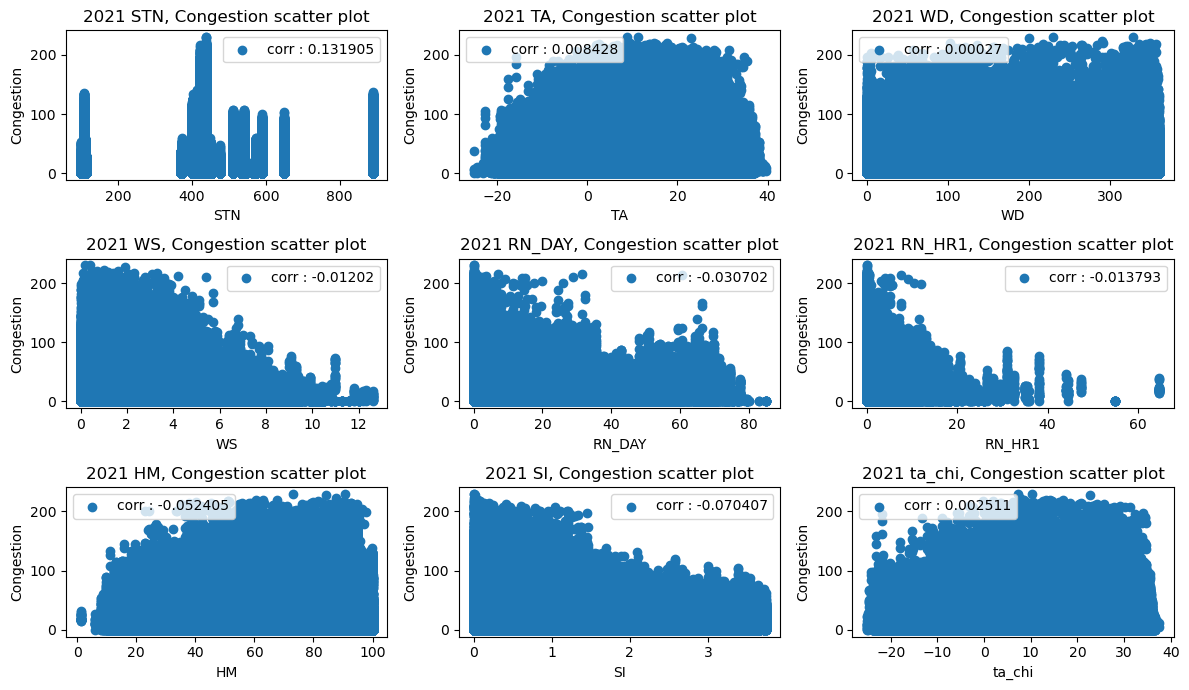

In [26]:
col = 3 
row = 3 
column_list = ['STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi']

plt.figure(figsize=(12,7))

for i, colum_name in enumerate(column_list,1):
    plt.subplot(col, row, i)
    plt.title(f'2021 {colum_name}, Congestion scatter plot')
    corr_result = train_subway21_dropna_0_df.corr(numeric_only=True)['Congestion'][colum_name]
    plt.scatter(train_subway21_dropna_0_df[colum_name], train_subway21_dropna_0_df['Congestion'], label=f'corr : {round(corr_result,6)}')
    plt.xlabel(colum_name)
    plt.ylabel('Congestion')
    plt.legend(loc="best")

plt.tight_layout()
plt.show()

In [27]:
train_subway22_dropna_0_df.corr(numeric_only=True)

,TM,Line,station_number,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
TM,1.000000,-0.005729,-0.005949,-0.003160,0.221867,-0.063956,-0.112062,0.038488,0.034900,0.183155,-0.064433,0.230662,0.140083
Line,-0.005729,1.000000,0.656006,0.103318,0.017535,-0.010422,-0.043832,0.003386,0.000605,-0.038036,0.003189,0.018224,-0.058127
station_number,-0.005949,0.656006,1.000000,-0.021957,0.006356,-0.001408,-0.022603,0.003110,0.002503,-0.008627,0.003288,0.006688,-0.155784
STN,-0.003160,0.103318,-0.021957,1.000000,0.014245,-0.010877,-0.224940,-0.003464,-0.002222,0.023334,0.003697,0.014095,0.114425
TA,0.221867,0.017535,0.006356,0.014245,1.000000,-0.070501,-0.020842,0.128226,0.072062,0.234329,0.215167,0.992270,0.001727
WD,-0.063956,-0.010422,-0.001408,-0.010877,-0.070501,1.000000,0.160122,-0.037202,-0.033890,-0.192537,0.089619,-0.093515,0.004210
WS,-0.112062,-0.043832,-0.022603,-0.224940,-0.020842,0.160122,1.000000,0.013947,0.011868,-0.229049,0.189718,-0.054299,-0.018370
RN_DAY,0.038488,0.003386,0.003110,-0.003464,0.128226,-0.037202,0.013947,1.000000,0.576881,0.312291,-0.151762,0.154149,-0.015976
RN_HR1,0.034900,0.000605,0.002503,-0.002222,0.072062,-0.033890,0.011868,0.576881,1.000000,0.212899,-0.120700,0.091600,-0.005806
HM,0.183155,-0.038036,-0.008627,0.023334,0.234329,-0.192537,-0.229049,0.312291,0.212899,1.000000,-0.530521,0.301250,-0.038503


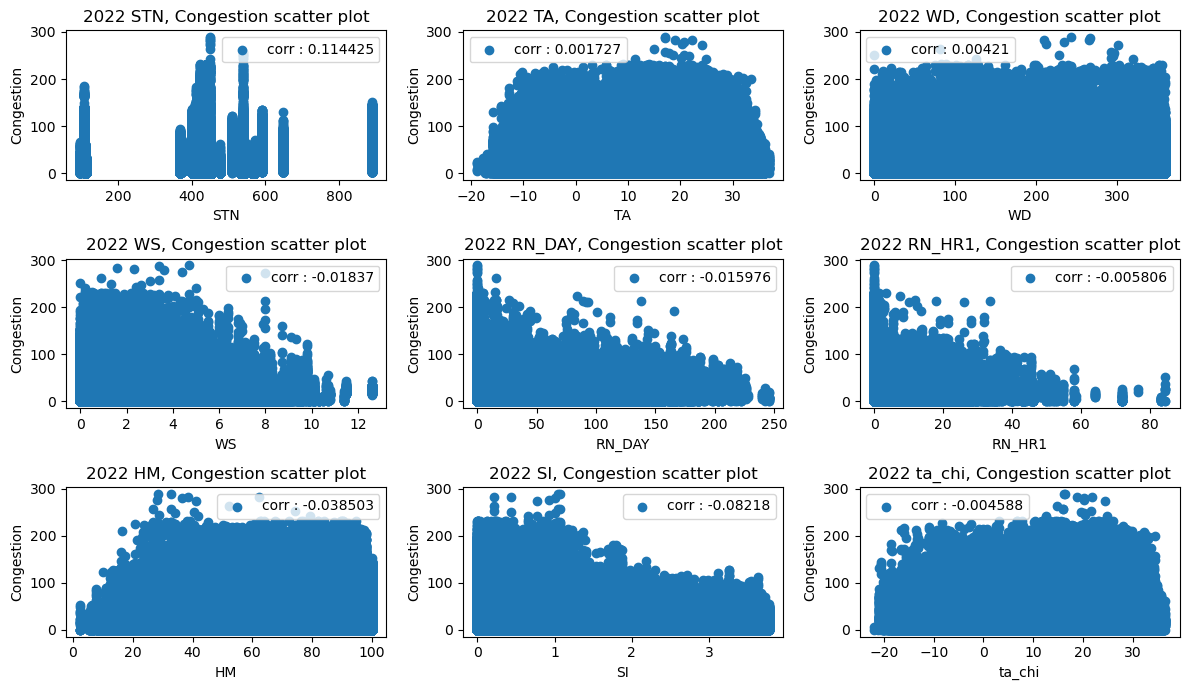

In [28]:
col = 3 
row = 3 
column_list = ['STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi']

plt.figure(figsize=(12,7))

for i, colum_name in enumerate(column_list,1):
    plt.subplot(col, row, i)
    plt.title(f'2022 {colum_name}, Congestion scatter plot')
    corr_result = train_subway22_dropna_0_df.corr(numeric_only=True)['Congestion'][colum_name]
    plt.scatter(train_subway22_dropna_0_df[colum_name], train_subway22_dropna_0_df['Congestion'], label=f'corr : {round(corr_result,6)}')
    plt.xlabel(colum_name)
    plt.ylabel('Congestion')
    plt.legend(loc="best")

plt.tight_layout()
plt.show()

In [29]:
train_subway23_dropna_0_df.corr(numeric_only=True)

,TM,Line,station_number,STN,TA,WD,WS,RN_DAY,RN_HR1,HM,SI,ta_chi,Congestion
TM,1.000000,-0.001791,-0.002528,-0.002008,0.211375,-0.059932,-0.057477,0.047611,0.036075,0.249966,-0.090568,0.215042,0.030056
Line,-0.001791,1.000000,0.649133,0.103768,0.006154,-0.009322,-0.035650,0.002837,0.001979,-0.035043,-0.000192,0.005913,0.000537
station_number,-0.002528,0.649133,1.000000,-0.023043,0.001072,0.007312,-0.019115,0.001998,0.000750,0.005516,0.001349,0.001719,-0.107332
STN,-0.002008,0.103768,-0.023043,1.000000,0.007039,-0.006137,-0.223138,-0.002888,-0.000917,0.012102,0.001735,0.007339,0.119858
TA,0.211375,0.006154,0.001072,0.007039,1.000000,-0.062162,-0.062749,0.092386,0.058833,0.154585,0.255235,0.992184,-0.001193
WD,-0.059932,-0.009322,0.007312,-0.006137,-0.062162,1.000000,0.183637,-0.050159,-0.044800,-0.203401,0.100480,-0.087954,0.014057
WS,-0.057477,-0.035650,-0.019115,-0.223138,-0.062749,0.183637,1.000000,0.038649,0.025759,-0.202077,0.175275,-0.095434,0.005060
RN_DAY,0.047611,0.002837,0.001998,-0.002888,0.092386,-0.050159,0.038649,1.000000,0.438988,0.359559,-0.207054,0.124970,-0.018994
RN_HR1,0.036075,0.001979,0.000750,-0.000917,0.058833,-0.044800,0.025759,0.438988,1.000000,0.223237,-0.133386,0.081285,-0.022146
HM,0.249966,-0.035043,0.005516,0.012102,0.154585,-0.203401,-0.202077,0.359559,0.223237,1.000000,-0.548121,0.221720,-0.056194


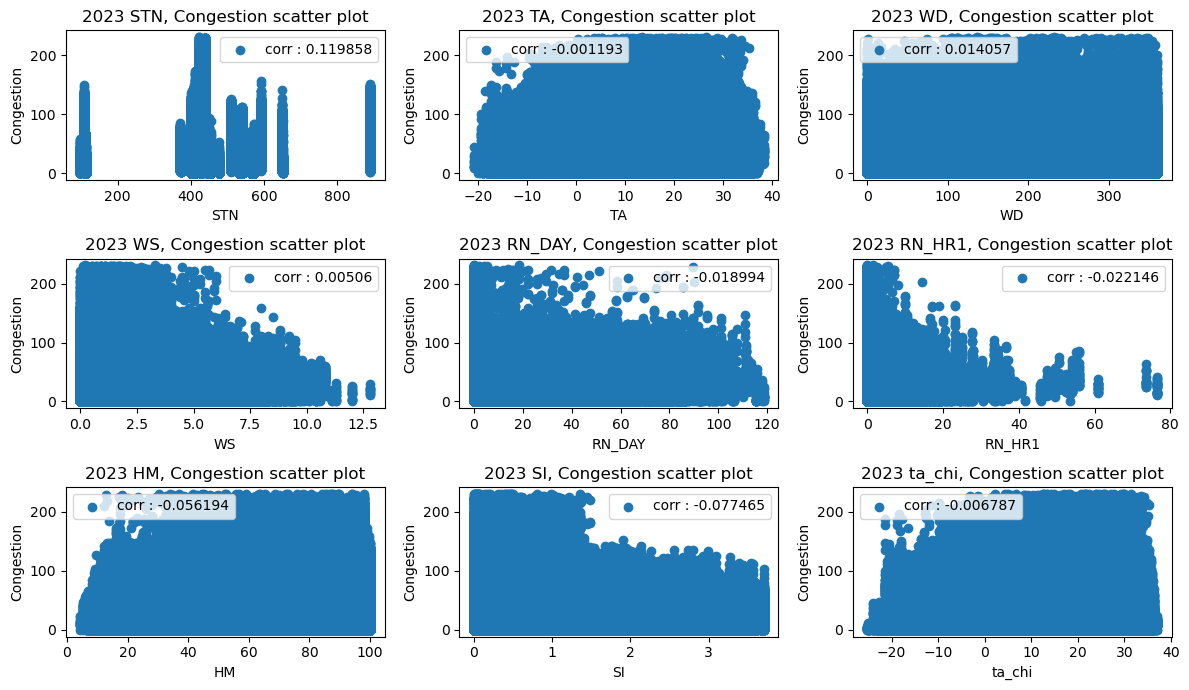

In [30]:
col = 3 
row = 3 
column_list = ['STN','TA','WD','WS','RN_DAY','RN_HR1','HM','SI','ta_chi']

plt.figure(figsize=(12,7))

for i, colum_name in enumerate(column_list,1):
    plt.subplot(col, row, i)
    plt.title(f'2023 {colum_name}, Congestion scatter plot')
    corr_result = train_subway23_dropna_0_df.corr(numeric_only=True)['Congestion'][colum_name]
    plt.scatter(train_subway23_dropna_0_df[colum_name], train_subway23_dropna_0_df['Congestion'], label=f'corr : {round(corr_result,6)}')
    plt.xlabel(colum_name)
    plt.ylabel('Congestion')
    plt.legend(loc="best")

plt.tight_layout()
plt.show()